In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
from warnings import filterwarnings as fw
fw("ignore")

In [7]:
df = pd.read_csv("revenue_prediction.csv")
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [9]:
df.shape

(100, 8)

In [10]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [11]:
df[df["Name"].duplicated()]

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue


<Axes: xlabel='City'>

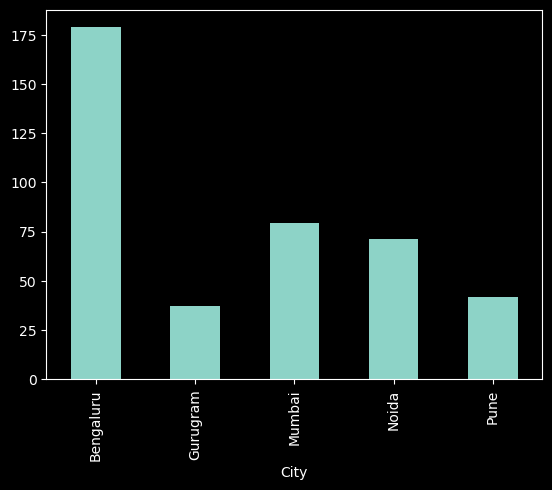

In [12]:
df.groupby("City")["Order_Placed"].sum().plot.bar()

<Axes: xlabel='City'>

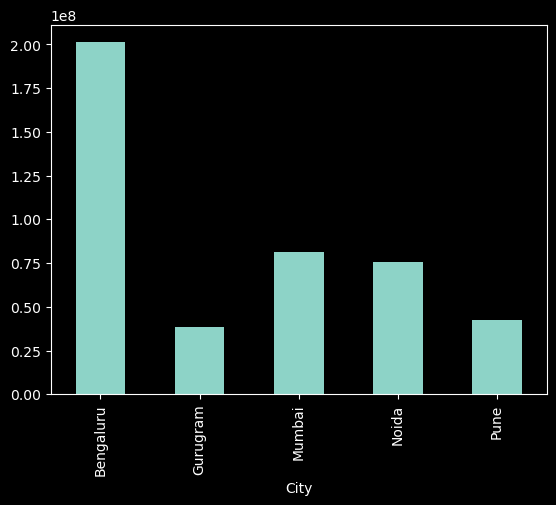

In [13]:
df.groupby("City")["Revenue"].sum().plot.bar()

In [14]:
df.groupby("City")["Name"].count().reset_index()

,City,Name
0,Bengaluru,43
1,Gurugram,7
2,Mumbai,19
3,Noida,18
4,Pune,13


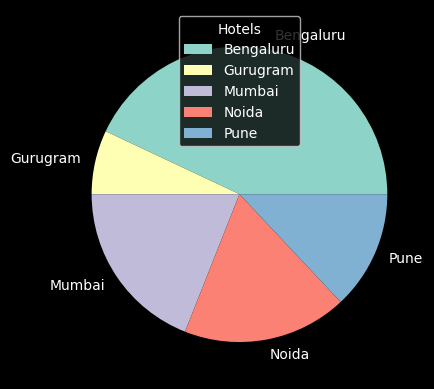

In [15]:
hotels_by_city = df.groupby("City")["Name"].count().reset_index()
plt.pie(hotels_by_city.iloc[:,1], labels = hotels_by_city.iloc[:,0])
plt.legend(title = "Hotels")
plt.show() 

# Cleaning Order_Placed

In [16]:
#These values are in Lacs!

df['Order_Placed'].unique()

array([ 5.5,  6.8,  1.9,  2.5,  4.2,  4.9,  5. ,  4.3,  4.8,  5.3,  3.6,
        1.6,  4.7,  1.8,  3.1, 10.8,  8.1,  5.2,  5.4,  1. ,  3.8,  2.8,
        8.8,  2.1,  4.6,  3.3,  2.9,  2.2,  4. ,  2.6,  3.7,  6.7,  4.4,
        4.1,  7.7,  7.1,  8.5,  4.5,  3.4,  3. ,  5.1,  1.5,  2.4,  1.7,
       13. ,  3.5,  6.1,  3.9,  5.7,  7.2,  5.8,  6.5,  1.1,  6.3,  6.2])

In [17]:
def update_Order_Placed(num):
    return num*100000

df['Order_Placed'] = df['Order_Placed'].apply(update_Order_Placed)

In [18]:
df['Order_Placed']

0     550000.0
1     680000.0
2     190000.0
3     250000.0
4     420000.0
        ...   
95    110000.0
96    630000.0
97    620000.0
98    210000.0
99    440000.0
Name: Order_Placed, Length: 100, dtype: float64

In [19]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,550000.0,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,680000.0,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,190000.0,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,250000.0,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,420000.0,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,110000.0,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,630000.0,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,620000.0,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,210000.0,2344689


In [20]:
#Renaming Columns

df.rename(columns = {'Order_Placed' : 'Placed_Orders'}, inplace=True)
df

,Id,Name,Franchise,Category,City,No_Of_Item,Placed_Orders,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,550000.0,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,680000.0,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,190000.0,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,250000.0,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,420000.0,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,110000.0,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,630000.0,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,620000.0,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,210000.0,2344689


In [21]:
df['City'].unique()

array(['Bengaluru', 'Gurugram', 'Pune', 'Mumbai', 'Noida'], dtype=object)

# Cleaning Category

In [22]:
df['Category'].value_counts(ascending = False)

Varied Menu        16
Mexican            10
Pizza               9
Steak               7
Family Style        7
Burger              7
Sandwich            7
Italian/Pizza       7
Bakery Cafe         5
BBQ                 4
Seafood             4
Family Casual       3
Frozen Desserts     2
Coffee Cafe         2
Chicken             2
Sports Bar          2
Asian/Noodle        2
Snack               2
Asian               1
Healthy             1
Name: Category, dtype: int64

In [23]:
#Separting all the Big values from Small values which have less than 5 occurence

Category = df['Category'].value_counts(ascending = False)
Category

Varied Menu        16
Mexican            10
Pizza               9
Steak               7
Family Style        7
Burger              7
Sandwich            7
Italian/Pizza       7
Bakery Cafe         5
BBQ                 4
Seafood             4
Family Casual       3
Frozen Desserts     2
Coffee Cafe         2
Chicken             2
Sports Bar          2
Asian/Noodle        2
Snack               2
Asian               1
Healthy             1
Name: Category, dtype: int64

In [24]:
Category_lessthan5 = Category[Category<5]
Category_lessthan5

BBQ                4
Seafood            4
Family Casual      3
Frozen Desserts    2
Coffee Cafe        2
Chicken            2
Sports Bar         2
Asian/Noodle       2
Snack              2
Asian              1
Healthy            1
Name: Category, dtype: int64

In [25]:
def handle_Category(value):
    if(value in Category_lessthan5):
        return 'Others'
    else:
        return value
    
df['Category'] = df['Category'].apply(handle_Category)
df['Category'].value_counts()

Others           25
Varied Menu      16
Mexican          10
Pizza             9
Italian/Pizza     7
Steak             7
Sandwich          7
Burger            7
Family Style      7
Bakery Cafe       5
Name: Category, dtype: int64

In [26]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Placed_Orders,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,550000.0,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,680000.0,7223131
2,103,Chuy's,Yes,Others,Pune,25,190000.0,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,250000.0,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,420000.0,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,110000.0,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,630000.0,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,620000.0,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Others,Pune,25,210000.0,2344689


# Cleaning City Column

In [27]:
df['City'].value_counts()

Bengaluru    43
Mumbai       19
Noida        18
Pune         13
Gurugram      7
Name: City, dtype: int64

# VISUALIZATION

# Count Plot of Various Locations

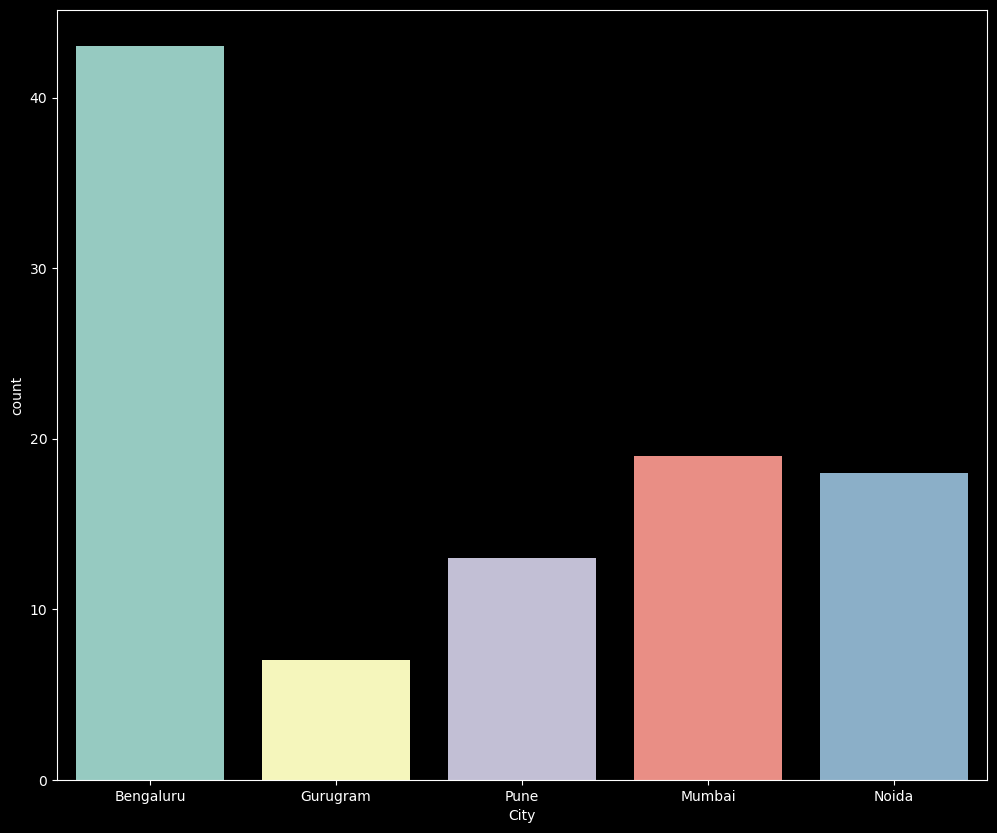

In [28]:
plt.figure(figsize = (12,10))
ax = sns.countplot(x=df['City'])
#plt.xticks(rotation=90)

By this plot we can make out that the maximum number of Restraunts are present in Bengaluru.
So, if we want to open any restraunt we should not opt for Bengaluru like city, as there is already tough competition.

# Visualizing Franchise

<Axes: xlabel='Franchise', ylabel='count'>

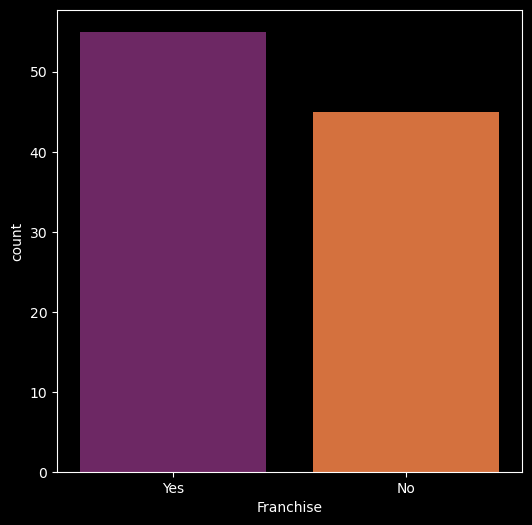

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['Franchise'], palette='inferno')

This shows how many Restraunts have their Franchises.

# Visualizing Placed_Orders V/s Category

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Mexican'),
  Text(1, 0, 'Varied Menu'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Italian/Pizza'),
  Text(4, 0, 'Pizza'),
  Text(5, 0, 'Steak'),
  Text(6, 0, 'Sandwich'),
  Text(7, 0, 'Bakery Cafe'),
  Text(8, 0, 'Burger'),
  Text(9, 0, 'Family Style')])

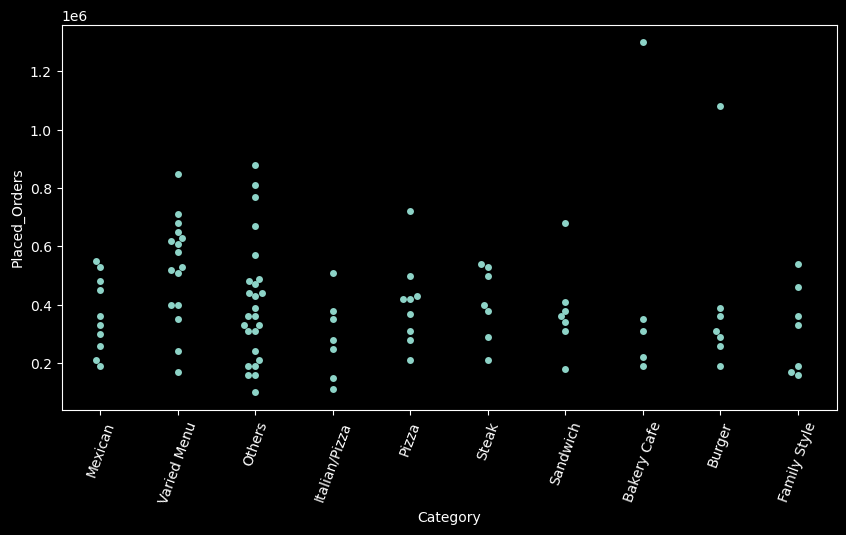

In [30]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Category', y='Placed_Orders', data=df)
plt.xticks(rotation=70)

This visualization depicts which Category or Cusine people prefer the most and spend on.
Which can help determine to chose a domain to open a restraunt or to invest in.

# Visualizing Top Cuisines

In [34]:
dfCuisines = df[['Category', 'Revenue']]
dfCuisines = dfCuisines.groupby(['Category'])['Revenue'].sum()
dfCuisines = dfCuisines.to_frame()
dfCuisines = dfCuisines.sort_values('Revenue', ascending=False)
dfCuisines 

,Revenue
Category,
Others,104573082
Varied Menu,88159648
Burger,38548779
Pizza,38469999
Mexican,36817925
Steak,29798662
Bakery Cafe,28749002
Sandwich,28032069
Family Style,25132641


In [35]:
dfCuisines = dfCuisines.iloc[2:,:]
dfCuisines

,Revenue
Category,
Burger,38548779
Pizza,38469999
Mexican,36817925
Steak,29798662
Bakery Cafe,28749002
Sandwich,28032069
Family Style,25132641
Italian/Pizza,21234283


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Burger'),
  Text(1, 0, 'Pizza'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'Steak'),
  Text(4, 0, 'Bakery Cafe'),
  Text(5, 0, 'Sandwich'),
  Text(6, 0, 'Family Style'),
  Text(7, 0, 'Italian/Pizza')])

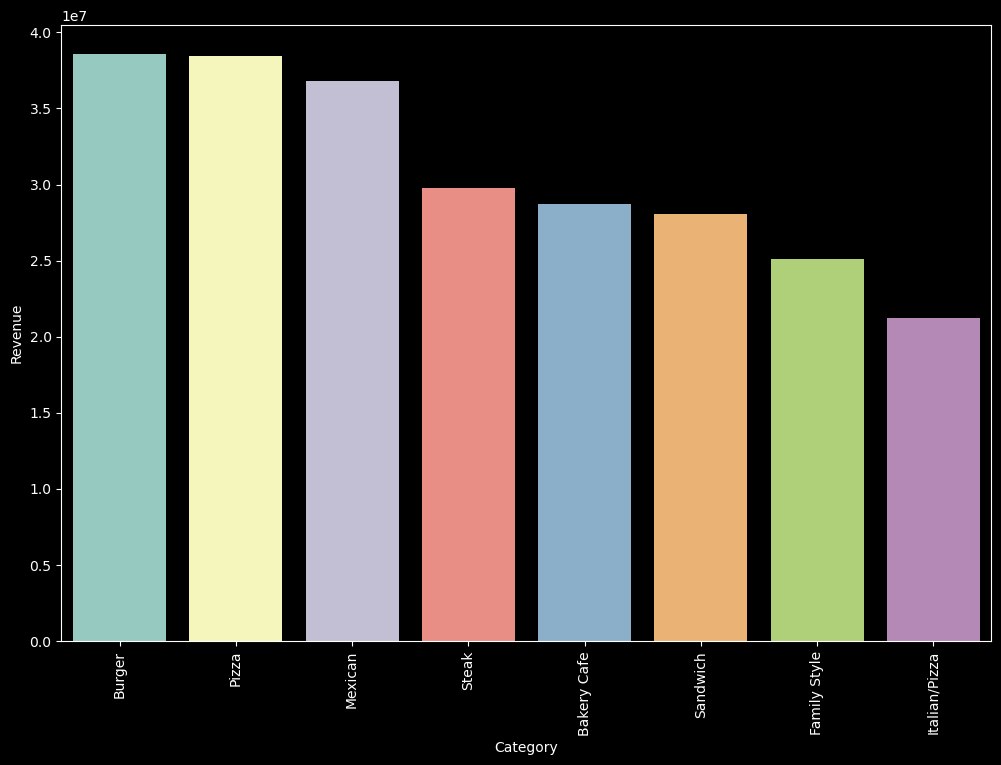

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x=dfCuisines.index, y=dfCuisines['Revenue'])
plt.xticks(rotation=90)

This visualization depicts which Cuisnine prefer the most. This also helps in depicting if you're planning to open a restraunt which domain or cuisine you should invest in.